In [1]:
import seaborn as sns
from pandas import read_csv
from funciones import tipo_transferencia, monto_en_rangos, cargar_rango

transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
analisis = transactions[["target", "feat_card_4", "ammount"]]

In [3]:
analisis = analisis.rename(columns={"target":"Transaccion", "feat_card_4":"Tarjeta", "ammount":"Monto en $"})

In [4]:
analisis = analisis.fillna("Otra")

In [5]:
analisis["Transaccion"] = analisis["Transaccion"].map(tipo_transferencia)

In [6]:
analisis = analisis[analisis.Transaccion == "Fraude"]

In [7]:
analisis.describe()

,Monto en $
count,17580.000000
mean,148.705139
std,228.164551
min,0.292000
25%,35.950000
50%,76.366500
75%,169.000000
max,5191.000000


In [8]:
analisis["Rango de monto en $"] = analisis["Monto en $"].map(monto_en_rangos)

In [9]:
analisis

,Transaccion,Tarjeta,Monto en $,Rango de monto en $
203,Fraude,visa,445.000,500
240,Fraude,visa,37.098,100
243,Fraude,visa,37.098,100
245,Fraude,visa,37.098,100
288,Fraude,visa,155.521,500
...,...,...,...,...
501935,Fraude,visa,34.552,100
501936,Fraude,visa,34.552,100
501941,Fraude,mastercard,250.000,500
501942,Fraude,visa,100.000,500


In [10]:
analisis = analisis.pivot_table(values="Monto en $", index="Rango de monto en $", columns="Tarjeta", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_8736\3908268658.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis = analisis.pivot_table(values="Monto en $", index="Rango de monto en $", columns="Tarjeta", aggfunc=sum)


In [11]:
analisis = analisis.fillna(0)

In [12]:
for columna in list(analisis.columns):
    analisis[columna] = analisis[columna] * 100 / analisis[columna].sum()

In [13]:
analisis = analisis.reset_index()

In [14]:
analisis["Rango de monto en $"] = analisis["Rango de monto en $"].map(cargar_rango)

In [15]:
analisis = analisis.set_index("Rango de monto en $")

Text(0.5, 1.0, 'Fraude en tarjetas')

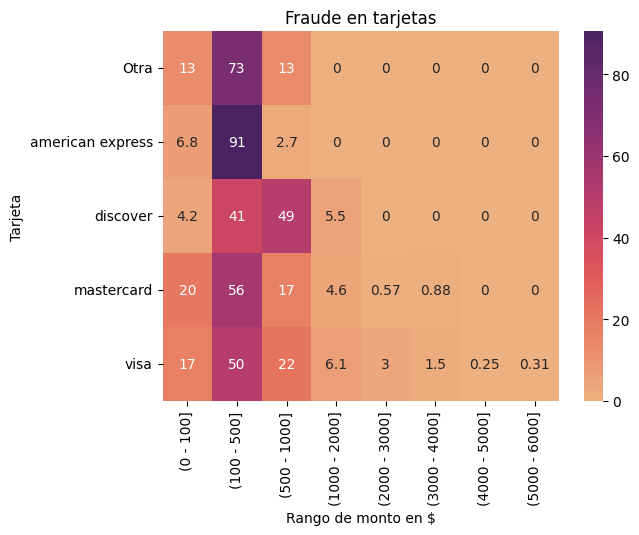

In [16]:
heatmap = sns.heatmap(analisis.T, annot=True, cmap=sns.color_palette("flare", as_cmap=True))
heatmap.set_title("Fraude en tarjetas")